Iteration   0: loss 2.1326703600
Iteration   1: loss 2.0419403480
Iteration   2: loss 1.9574834866
Iteration   3: loss 1.8485062207
Iteration   4: loss 1.7044138346
Iteration   5: loss 1.5166113481
Iteration   6: loss 1.2961874645
Iteration   7: loss 1.1587330979
Iteration   8: loss 1.1391404742
Iteration   9: loss 1.1140196766
Iteration  10: loss 1.1004892203
Iteration  11: loss 1.1256293036
Iteration  12: loss 1.0241799593
Iteration  13: loss 0.9501462759
Iteration  14: loss 0.8803958990
Iteration  15: loss 0.7762005203
Iteration  16: loss 0.6804210703
Iteration  17: loss 0.6760296029
Iteration  18: loss 1.0465694678
Iteration  19: loss 0.5492395271
Iteration  20: loss 0.6513803883
Iteration  21: loss 1.0173839554
Iteration  22: loss 0.5592579484
Iteration  23: loss 0.4191113885
Iteration  24: loss 0.3737362983
Iteration  25: loss 0.2685724928
Iteration  26: loss 0.2275235982
Iteration  27: loss 0.2655189661
Iteration  28: loss 0.2778663402
Iteration  29: loss 0.3862071640
Iteration 

Iteration 249: loss 0.0649158543
Iteration 250: loss 0.0272599942
Iteration 251: loss 0.0234267454
Iteration 252: loss 0.0473117999
Iteration 253: loss 0.1224079218
Iteration 254: loss 0.0767757058
Iteration 255: loss 0.0636166410
Iteration 256: loss 0.0258569184
Iteration 257: loss 0.0146627576
Iteration 258: loss 0.0283395801
Iteration 259: loss 0.0441846020
Iteration 260: loss 0.0870411788
Iteration 261: loss 0.0537444498
Iteration 262: loss 0.0380930724
Iteration 263: loss 0.0167179845
Iteration 264: loss 0.0123461084
Iteration 265: loss 0.0211591909
Iteration 266: loss 0.0342850157
Iteration 267: loss 0.0620586905
Iteration 268: loss 0.0576204827
Iteration 269: loss 0.0760691459
Iteration 270: loss 0.0479607790
Iteration 271: loss 0.0390733809
Iteration 272: loss 0.0168460997
Iteration 273: loss 0.0107897602
Iteration 274: loss 0.0146869336
Iteration 275: loss 0.0309202362
Iteration 276: loss 0.0733256258
Iteration 277: loss 0.0853445486
Iteration 278: loss 0.1619055351
Iteration 

Iteration 498: loss 0.0229673052
Iteration 499: loss 0.0369458442
Finish running the code!


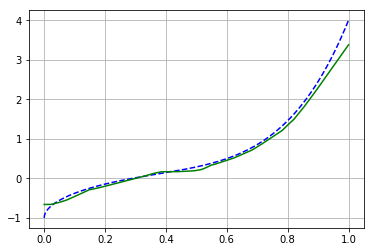

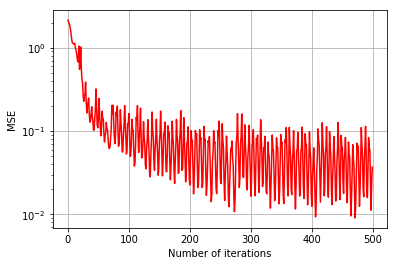

In [60]:
import os, csv, argparse, sys
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
sys.path.append('..')
from utility import *
        
"""
TODO: Execture
"""
if __name__ == '__main__':
    num_data = 2000
    MAX_Iter = 500 #20 itr/epoch
    BATCH_SIZE = 100
    
    num_func = 0
    num_model = 0
    
    exec('f = f%s' % num_func)
    exec('net = Net%s().cuda().double() ' % num_model)
    
    net.fc1.weight.data.normal_(0.0, 0.1)
    net.fc1.bias.data.normal_(0.0, 0.1)
    net.fc2.weight.data.normal_(0.0, 0.1)
    net.fc2.bias.data.normal_(0.0, 0.1)
    net.fc3.weight.data.normal_(0.0, 0.1)
    net.fc3.bias.data.normal_(0.0, 0.1)
    
    data_save_file_name = 'func' + str(num_func) + '_model' + str(num_model) + '_data.dat'
    loss_save_file_name = 'func' + str(num_func) + '_model' + str(num_model) + '_loss.dat'
    
    loader = UtiData.DataLoader(dataset=make_feature(num_data, f), 
                                batch_size=BATCH_SIZE, 
                                shuffle=True, num_workers=1)
    
    #criterion = nn.MSELoss().cuda()
    criterion = nn.MSELoss().cuda()
    
    #optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.005)
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0.0000)
    
    loss_total = []
    for iter in range(0,MAX_Iter):
        running_loss = 0.0
        optimizer.zero_grad()
        for step_i, (x_batch, y_batch) in enumerate(loader):
            if x_batch.size(0) != BATCH_SIZE or y_batch.size(0) != BATCH_SIZE:
                continue
            
            x_input = Variable(x_batch.type(torch.DoubleTensor).cuda())
            y_input = Variable(y_batch.type(torch.DoubleTensor).cuda())
            
            y_hat = net(x_input)
            
            loss = criterion(y_hat, y_input)
            loss.backward()
        
            optimizer.step()
            running_loss += loss.data[0]
            
        loss_total.append(running_loss/(num_data/BATCH_SIZE))
        print('Iteration %3d: loss %.10f' % (iter, running_loss/(num_data/BATCH_SIZE)))

    x_show = np.linspace(0,1,num_data) 
    y_show = f(x_show)
    yhat_test = net(Variable(torch.from_numpy(x_show).unsqueeze(1).type(torch.DoubleTensor).cuda())).data.cpu().numpy().squeeze(1)
    
    yhat_show = []
    for i in range(len(yhat_test)):
        yhat_show.append(yhat_test[i])
    
    plt.figure(1), 
    plt.plot(x_show, y_show, 'b--'), 
    plt.plot(x_show, yhat_test, 'g'), plt.grid(True)

    plt.figure(2), 
    plt.semilogy(loss_total, 'r')
    plt.xlabel('Number of iterations')
    plt.ylabel('MSE'), plt.grid(True)
    
    print('Finish running the code!')